# Part B

## Problem 1

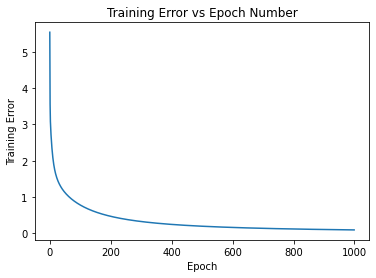

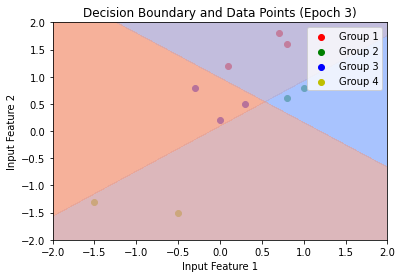

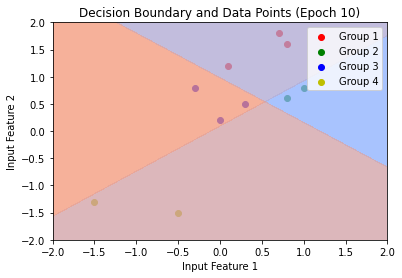

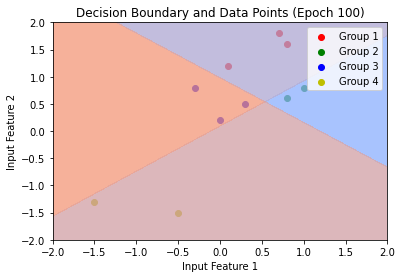

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize the network's parameters
np.random.seed(0)  # For reproducibility
input_size = 2
output_size = 2
learning_rate = 1.0
epochs = 1000

# Define the input matrix and target matrix
X = np.array([[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5],
              [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]])

Y = np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

# Initialize weights and biases
weights = np.random.rand(output_size, input_size)
biases = np.random.rand(output_size, 1)

# Initialize error history
error_history = []

# Model Training
for epoch in range(epochs):
    total_error = 0

    for i in range(X.shape[1]):
        # Forward pass
        Z = np.dot(weights, X[:, i].reshape(-1, 1)) + biases
        Y_pred = sigmoid(Z)

        # Calculate the error
        error = Y_pred - Y[:, i].reshape(-1, 1)
        total_error += np.sum(error**2)

        # Backpropagation
        dY = sigmoid_derivative(Y_pred)* error
        dW = np.dot(dY, X[:, i].reshape(1, -1))
        dB = dY

        # Update weights and biases
        weights += learning_rate * dW
        biases += learning_rate * dB

    # Append the total error to the history
    error_history.append(total_error)

# Plot training error vs epoch number
plt.figure(1)
plt.plot(range(epochs), error_history)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs Epoch Number')

# Plot decision boundary and data points for different epochs
for epoch in [3, 10, 100]:
    plt.figure(epoch)
    plt.scatter(X[0, :3], X[1, :3], c='r', marker='o', label='Group 1')
    plt.scatter(X[0, 3:5], X[1, 3:5], c='g', marker='o', label='Group 2')
    plt.scatter(X[0, 5:8], X[1, 5:8], c='b', marker='o', label='Group 3')
    plt.scatter(X[0, 8:], X[1, 8:], c='y', marker='o', label='Group 4')
    
    # Create a mesh grid to plot the decision boundary
    x_range = np.linspace(-2, 2, 100)
    y_range = np.linspace(-2, 2, 100)
    X_mesh, Y_mesh = np.meshgrid(x_range, y_range)
    Z_mesh = sigmoid(np.dot(weights, np.vstack([X_mesh.ravel(), Y_mesh.ravel()])) + biases)
    Z_mesh0 = Z_mesh[0].reshape(X_mesh.shape)
    Z_mesh1 = Z_mesh[1].reshape(X_mesh.shape)
    plt.contourf(X_mesh, Y_mesh, Z_mesh0, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.5)
    plt.contourf(X_mesh, Y_mesh, Z_mesh1, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.5)
    plt.xlabel('Input Feature 1')
    plt.ylabel('Input Feature 2')
    plt.title(f'Decision Boundary and Data Points (Epoch {epoch})')
    plt.legend()

plt.show()

## Problem 2

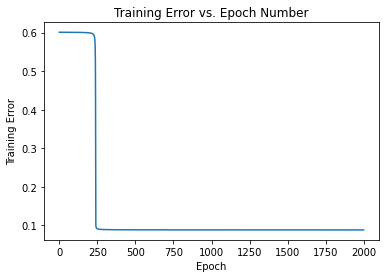

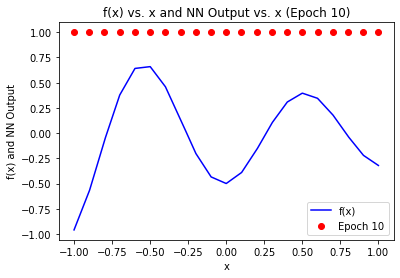

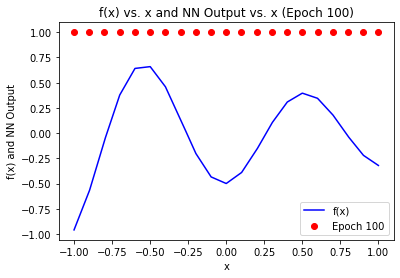

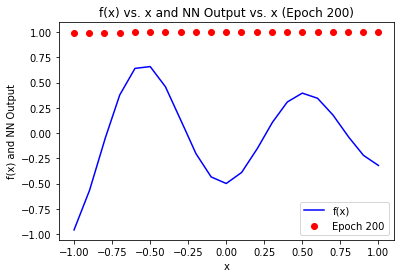

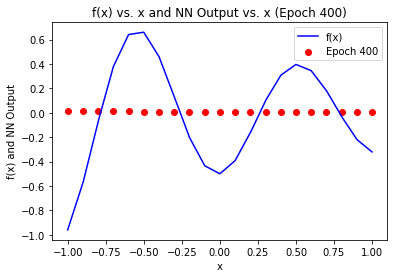

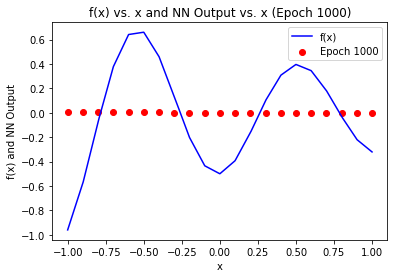

In [152]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the architecture of the neural network
input_size = 1
hidden_size = 32
output_size = 1

# Initialize weights and biases
W1 = np.random.rand(input_size, hidden_size)
B1 = np.random.rand(1,hidden_size)
W2 = np.random.rand(hidden_size, output_size)
B2 = np.random.rand(1,output_size)

# Define hyperparameters
lr = 0.06
epochs = 2000
epoch_list = [10, 100, 200, 400, 1000]

# Define the input and target data
X = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
Y = np.array([-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321])

# Lists to store training errors and network outputs for different epochs
training_errors = []
network_outputs = {}
for epoch in range(epochs):
    network_output = []
    
    # Forward pass
    input_layer = X.reshape(-1,1)
    hidden_in = np.dot(input_layer, W1) + B1
    hidden_out = sigmoid(hidden_in)
    output_in = np.dot(hidden_out, W2) + B2
    output_out = sigmoid(output_in)

    # Compute error
    error = 0.5 * (output_out - Y.reshape(-1,1))**2
    training_errors.append(np.mean(error))
    network_output.append(output_out)

    # Backpropagation
    delta_output = (output_out -output_data)*sigmoid_derivative(output_out)
    delta_hidden = np.dot(delta_output, W2.T) * sigmoid_derivative(hidden_out)
    
    W2 -= lr * np.dot(hidden_out.T, delta_output)
    B2 -= lr * np.sum(delta_output, axis=0, keepdims=True)
    
    W1 -= lr * np.dot(input_layer.T, delta_hidden)
    B1 -= lr * np.sum(delta_hidden, axis=0, keepdims=True)


    if epoch in epoch_list:
        network_outputs[epoch] = network_output

# Plot the training error vs. epoch number
plt.figure(1)
plt.plot(range(epochs), training_errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epoch Number')

# Plot the actual function f(x) and network output vs. x for different epochs
x_values = np.linspace(-1, 1, 1000)
actual_function = [np.interp(x, X, Y) for x in x_values]
for epoch in [10, 100, 200, 400, 1000]:
    plt.figure(epoch)
    plt.plot(x_values, actual_function, c='b', label='f(x)')
    plt.scatter(X, network_outputs[epoch], c='r', marker='o', label=f'Epoch {epoch}')
    
    plt.xlabel('x')
    plt.ylabel('f(x) and NN Output')
    plt.title(f'f(x) vs. x and NN Output vs. x (Epoch {epoch})')
    plt.legend()

plt.show()

## Problem 3

/tmp/ipykernel_632643/235371841.py:7: RuntimeWarning: overflow encountered in exp
  return (1 - np.exp(-100 * x)) / (1 + np.exp(-100 * x))
/tmp/ipykernel_632643/235371841.py:7: RuntimeWarning: invalid value encountered in divide
  return (1 - np.exp(-100 * x)) / (1 + np.exp(-100 * x))


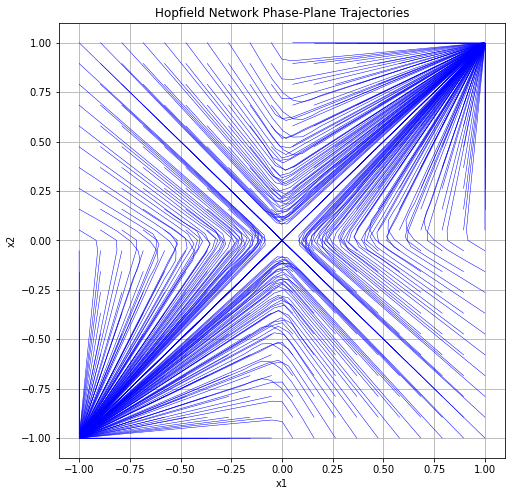

In [107]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return (1 - np.exp(-100 * x)) / (1 + np.exp(-100 * x))

# Define the differential equation for the Hopfield network
def hopfield_network(t, x):
    W = np.array([[0, 1], [1, 0]])
    b = np.array([0, 0])
    dxdt = -0.5 * x + 0.5 * np.dot(W, sigmoid(x)) + 0.5 * b
    return dxdt

# Create a grid of initial conditions
x1_range = np.linspace(-1, 1, 20)
x2_range = np.linspace(-1, 1, 20)
initial_conditions = [(x1, x2) for x1 in x1_range for x2 in x2_range]

# Time span for integration
t_span = (0, 10)

# Plot phase-plane trajectories for each initial condition
plt.figure(figsize=(8, 8))
for initial_condition in initial_conditions:
    sol = solve_ivp(hopfield_network, t_span, initial_condition, t_eval=np.linspace(*t_span, 100))
    plt.plot(sol.y[0], sol.y[1], 'b-', lw=0.5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Hopfield Network Phase-Plane Trajectories')
plt.grid()
plt.show()

## Problem 4

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        output = torch.matmul(attn_probs, V)
        return output
        
    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)
        
    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)
        
    def forward(self, Q, K, V, mask=None):
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))
        
        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        output = self.W_o(self.combine_heads(attn_output))
        return output

class PositionWiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(PositionWiseFeedForward, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length):
        super(PositionalEncoding, self).__init__()
        
        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        self.register_buffer('pe', pe.unsqueeze(0))
        
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]
    
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, mask):
        attn_output = self.self_attn(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.cross_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, enc_output, src_mask, tgt_mask):
        attn_output = self.self_attn(x, x, x, tgt_mask)
        x = self.norm1(x + self.dropout(attn_output))
        attn_output = self.cross_attn(x, enc_output, enc_output, src_mask)
        x = self.norm2(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout(ff_output))
        return x
    
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout):
        super(Transformer, self).__init__()
        self.encoder_embedding = nn.Embedding(src_vocab_size, d_model)
        self.decoder_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, tgt_vocab_size)
        self.dropout = nn.Dropout(dropout)

    def generate_mask(self, src, tgt):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        tgt_mask = (tgt != 0).unsqueeze(1).unsqueeze(3)
        seq_length = tgt.size(1)
        nopeak_mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length), diagonal=1)).bool()
        tgt_mask = tgt_mask & nopeak_mask
        return src_mask, tgt_mask

    def forward(self, src, tgt):
        src_mask, tgt_mask = self.generate_mask(src, tgt)
        src_embedded = self.dropout(self.positional_encoding(self.encoder_embedding(src)))
        tgt_embedded = self.dropout(self.positional_encoding(self.decoder_embedding(tgt)))

        enc_output = src_embedded
        for enc_layer in self.encoder_layers:
            enc_output = enc_layer(enc_output, src_mask)

        dec_output = tgt_embedded
        for dec_layer in self.decoder_layers:
            dec_output = dec_layer(dec_output, enc_output, src_mask, tgt_mask)

        output = self.fc(dec_output)
        return output



In [55]:
src_vocab_size = 5000
tgt_vocab_size = 5000
d_model = 512
num_heads = 8
num_layers = 6
d_ff = 2048
max_seq_length = 100
dropout = 0.1

transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout)

# Generate random sample data
src_data = torch.randint(1, src_vocab_size, (64, max_seq_length))  # (batch_size, seq_length)
tgt_data = torch.randint(1, tgt_vocab_size, (64, max_seq_length))  # (batch_size, seq_length)

In [114]:
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

transformer.train()
errors = []
for epoch in range(100):
    optimizer.zero_grad()
    output = transformer(src_data, tgt_data[:, :-1])
    loss = criterion(output.contiguous().view(-1, tgt_vocab_size), tgt_data[:, 1:].contiguous().view(-1))
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch+1}, Loss: {loss.item()}")
    errors.append(loss.item())

Epoch: 1, Loss: 0.39399033784866333
Epoch: 2, Loss: 2.5856130123138428
Epoch: 3, Loss: 0.552215576171875
Epoch: 4, Loss: 0.5206906795501709
Epoch: 5, Loss: 0.6011095643043518
Epoch: 6, Loss: 0.5967748165130615
Epoch: 7, Loss: 0.5194656848907471
Epoch: 8, Loss: 0.45311251282691956
Epoch: 9, Loss: 0.41406601667404175
Epoch: 10, Loss: 0.3949417769908905
Epoch: 11, Loss: 0.3865995705127716
Epoch: 12, Loss: 0.37317681312561035
Epoch: 13, Loss: 0.3613477647304535
Epoch: 14, Loss: 0.3523905575275421
Epoch: 15, Loss: 0.33997827768325806
Epoch: 16, Loss: 0.32489103078842163
Epoch: 17, Loss: 0.31415000557899475
Epoch: 18, Loss: 0.3015499413013458
Epoch: 19, Loss: 0.2904585301876068
Epoch: 20, Loss: 0.2818920314311981
Epoch: 21, Loss: 0.27453091740608215
Epoch: 22, Loss: 0.26380640268325806
Epoch: 23, Loss: 0.256856232881546
Epoch: 24, Loss: 0.25131845474243164
Epoch: 25, Loss: 0.24417342245578766
Epoch: 26, Loss: 0.23908089101314545
Epoch: 27, Loss: 0.23319008946418762
Epoch: 28, Loss: 0.2282018

Text(0.5, 1.0, 'Training Error vs. Epoch Number')

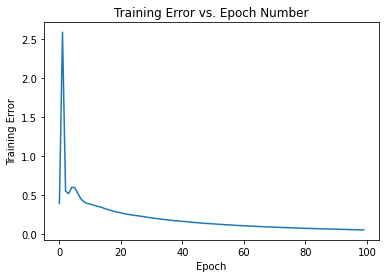

In [153]:
# Plot the training error vs. epoch number
plt.figure(1)
plt.plot(range(100), errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epoch Number')